Task 1 - Exploratory Data Analysis (EDA)

In [1]:
# Import necessary libraries
import sqlite3 # for database interaction
import pandas as pd # for data manipulation
import numpy as np    # for numerical operations
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for enhanced data visualization

# Define a function to load data from an SQLite database into a Pandas DataFrame
def load_data_from_sqlite(table_name):
    # Construct a SQL query to select all columns from the specified table where ID is not equal to 'ID'
    ## and execute the query using Pandas' read_sql_query function
    ### Connect to the SQLite database named 'calls.db'
    return pd.read_sql_query(f"SELECT * FROM {table_name} WHERE ID != 'ID'", sqlite3.connect('calls.db'))

# Define the table name to calls
table_name = 'calls' 
# Define function to load data from the SQLite database into a DataFrame
df = load_data_from_sqlite(table_name)
# Print the first 5 rows of the data
df.head()

,ID,Call Duration,Call Frequency,Financial Loss,Flagged by Carrier,Is International,Previous Contact Count,Country Prefix,Call Type,Timestamp,Device Battery,Scam Call
0,947429,-719,12,42.130000,Suspicious,Yes,1,95,Voip,2023-07-23 09:04:00,Fully Charged,Scam
1,540498,116,3,29.900000,Unlikely,Yes,0,91,Mobile,2023-09-05 20:11:00,Fully Charged,Scam
2,434243,29,16,723.460000,Very Suspicious,Yes,2,91,Voip,2023-12-16 11:03:00,Charging,Scam
3,903537,-563,4,64.287478,Unlikely,Yes,3,91,Telegram,2023-02-25 10:41:00,Fully Charged,Not Scam
4,969179,312,19,0.000000,Unlikely,Yes,0,91,Telegram,2023-11-10 15:53:00,Fully Charged,Scam


In [2]:
# Understand the Data
print("Dimensions of the dataset:", df.shape) # Print the dimensions (number of rows and columns) of the dataset
print("\nData types of each column:")
print(df.dtypes) # Print the data types of each column
print(df.describe()) # quick overview of the data

Dimensions of the dataset: (12000, 12)

Data types of each column:
ID                          int64
Call Duration               int64
Call Frequency              int64
Financial Loss            float64
Flagged by Carrier         object
Is International           object
Previous Contact Count      int64
Country Prefix             object
Call Type                  object
Timestamp                  object
Device Battery             object
Scam Call                  object
dtype: object
                  ID  Call Duration  Call Frequency  Financial Loss  \
count   12000.000000   12000.000000    12000.000000    10597.000000   
mean   551248.413500     100.259417       10.698167       95.128864   
std    257920.330881     288.006415        5.861791      191.516365   
min    100017.000000    -787.000000        2.000000     -896.400000   
25%    332326.250000     -30.000000        6.000000        0.000000   
50%    545820.000000      45.000000        9.000000       11.719081   
75%    776049.

In [3]:
# From the Problem Statement in the technical assessment pdf it stated 2023 dataset 
## I'll focus only on year 2023 data and do data exploration & statistics on it

# Convert 'Timestamp' column to datetime dtype
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Filter off other timeline
df2 = df[df['Timestamp'].dt.year == 2023]
df2

,ID,Call Duration,Call Frequency,Financial Loss,Flagged by Carrier,Is International,Previous Contact Count,Country Prefix,Call Type,Timestamp,Device Battery,Scam Call
0,947429,-719,12,42.130000,Suspicious,Yes,1,95,Voip,2023-07-23 09:04:00,Fully Charged,Scam
1,540498,116,3,29.900000,Unlikely,Yes,0,91,Mobile,2023-09-05 20:11:00,Fully Charged,Scam
2,434243,29,16,723.460000,Very Suspicious,Yes,2,91,Voip,2023-12-16 11:03:00,Charging,Scam
3,903537,-563,4,64.287478,Unlikely,Yes,3,91,Telegram,2023-02-25 10:41:00,Fully Charged,Not Scam
4,969179,312,19,0.000000,Unlikely,Yes,0,91,Telegram,2023-11-10 15:53:00,Fully Charged,Scam
...,...,...,...,...,...,...,...,...,...,...,...,...
11993,909445,32,9,624.600000,Suspicious,Yes,4,65,Voip,2023-02-11 21:57:00,Fully Charged,Scam
11994,802259,113,18,NaN,Very Suspicious,Yes,7,1,Mobile,2023-10-02 13:12:00,Fully Charged,Not Scam
11995,496033,116,15,NaN,Unlikely,Yes,4,7,Voip,2023-05-03 14:32:00,Fully Charged,Not Scam
11996,730960,621,3,11.740000,Suspicious,Yes,0,MM,Landline,2023-08-04 00:16:00,Fully Charged,Scam


In [4]:
# From above, I noticed the column "Country Prefix" is object instead of int(country code is all in int)
##Let's explore more in this column

df2[~df2['Country Prefix'].astype(str).str.isdigit()] # Display all non-integer values in 'Country Prefix' column 

,ID,Call Duration,Call Frequency,Financial Loss,Flagged by Carrier,Is International,Previous Contact Count,Country Prefix,Call Type,Timestamp,Device Battery,Scam Call
8,868175,-102,15,0.000000,Suspicious,Yes,1,MM,Voip,2023-07-25 16:27:00,Fully Charged,Scam
41,192915,-113,10,0.000000,Very Suspicious,Yes,4,MM,Telegram,2023-11-14 21:48:00,Fully Charged,Not Scam
55,782027,597,16,0.000000,Unlikely,Yes,1,MM,Landline,2023-10-12 22:50:00,Charging,Not Scam
62,119036,284,7,0.000000,Unlikely,Yes,0,MM,Voip,2023-04-24 12:04:00,Fully Charged,Not Scam
81,323712,44,10,0.000000,Very Suspicious,Yes,0,MM,Mobile,2023-12-15 01:27:00,Charging,Not Scam
...,...,...,...,...,...,...,...,...,...,...,...,...
11973,865623,603,19,27.300000,Unlikely,Yes,0,MM,Mobile,2023-09-26 13:51:00,Fully Charged,Scam
11975,184795,-46,4,30.936707,Very Suspicious,Yes,2,MM,Whats App,2023-06-22 21:12:00,Charging,Not Scam
11985,879565,117,3,0.000000,Unlikely,Yes,2,MM,Telegram,2023-02-19 00:32:00,Fully Charged,Scam
11990,832431,-26,6,496.820000,Suspicious,Yes,0,MM,Landline,2023-07-17 10:54:00,Not Charging,Scam


In [5]:
# From the above, top 5 rows & bottom 5 rows are all MM
# MM represent Myanmar, and the country code is 95

df3 = df2.copy() # Create a copy of the DataFrame

# Thus we replace all occurrences of "MM" in the "Country Prefix" column with 95
df3.loc[df2['Country Prefix'] == "MM", 'Country Prefix'] = 95
# Convert 'Country Prefix' column to integers type
df3.loc[:, 'Country Prefix'] = df3['Country Prefix'].astype(int)

# Inspect the data again
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9635 entries, 0 to 11998
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID                      9635 non-null   int64         
 1   Call Duration           9635 non-null   int64         
 2   Call Frequency          9635 non-null   int64         
 3   Financial Loss          8497 non-null   float64       
 4   Flagged by Carrier      9635 non-null   object        
 5   Is International        9635 non-null   object        
 6   Previous Contact Count  9635 non-null   int64         
 7   Country Prefix          9635 non-null   int32         
 8   Call Type               9635 non-null   object        
 9   Timestamp               9635 non-null   datetime64[ns]
 10  Device Battery          9635 non-null   object        
 11  Scam Call               9635 non-null   object        
dtypes: datetime64[ns](1), float64(1), int32(1), int

C:\Users\summe\AppData\Local\Temp\ipykernel_21204\3574980381.py:9: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df3.loc[:, 'Country Prefix'] = df3['Country Prefix'].astype(int)


In [6]:
# From reading the data above I noticed Call duration & Financial Loss columns should not be negative
## Filter off all the negative values in these 2 columns
df4 = df3[(df3['Financial Loss'] > 0) & (df3['Call Duration'] > 0)] 
df4

,ID,Call Duration,Call Frequency,Financial Loss,Flagged by Carrier,Is International,Previous Contact Count,Country Prefix,Call Type,Timestamp,Device Battery,Scam Call
1,540498,116,3,29.900000,Unlikely,Yes,0,91,Mobile,2023-09-05 20:11:00,Fully Charged,Scam
2,434243,29,16,723.460000,Very Suspicious,Yes,2,91,Voip,2023-12-16 11:03:00,Charging,Scam
7,892995,575,6,47.600000,Unlikely,Yes,3,95,Voip,2023-06-09 03:38:00,Not Charging,Scam
12,231771,116,10,5.861031,Unlikely,Yes,0,65,Voip,2023-09-15 01:48:00,Charging,Not Scam
13,847080,283,9,383.830000,Suspicious,Yes,0,1,Whats App,2023-12-18 05:26:00,Fully Charged,Scam
...,...,...,...,...,...,...,...,...,...,...,...,...
11967,986243,46,6,44.250704,Unlikely,Yes,0,91,Mobile,2023-10-31 03:35:00,Not Charging,Not Scam
11973,865623,603,19,27.300000,Unlikely,Yes,0,95,Mobile,2023-09-26 13:51:00,Fully Charged,Scam
11983,851167,268,14,84.234282,Unlikely,Yes,0,44,Telegram,2023-10-30 23:11:00,Not Charging,Not Scam
11993,909445,32,9,624.600000,Suspicious,Yes,4,65,Voip,2023-02-11 21:57:00,Fully Charged,Scam


In [7]:
# After filtering off all the negative values in call duration & Financial Loss column 
## It filter off 6,308 rows! Since those rows data can be quite valuable in our data exploration it can be data entry issue
### Let's ignore all the negative in these 2 columns and bring them to positive

# Create a copy of the DataFrame
df5 = df3.copy() 

# Change negative values to positive values in the 'Financial Loss' and 'Call Duration' columns by apply absolute value
df5.loc[:, 'Financial Loss'] = df5['Financial Loss'].abs()
df5.loc[:, 'Call Duration'] = df5['Call Duration'].abs()

# Convert Financial Loss column float values to 2 decimals
float_value = df5['Financial Loss']
df5['Financial Loss'] = round(float_value, 2)

# Show the updated data
df5

,ID,Call Duration,Call Frequency,Financial Loss,Flagged by Carrier,Is International,Previous Contact Count,Country Prefix,Call Type,Timestamp,Device Battery,Scam Call
0,947429,719,12,42.13,Suspicious,Yes,1,95,Voip,2023-07-23 09:04:00,Fully Charged,Scam
1,540498,116,3,29.90,Unlikely,Yes,0,91,Mobile,2023-09-05 20:11:00,Fully Charged,Scam
2,434243,29,16,723.46,Very Suspicious,Yes,2,91,Voip,2023-12-16 11:03:00,Charging,Scam
3,903537,563,4,64.29,Unlikely,Yes,3,91,Telegram,2023-02-25 10:41:00,Fully Charged,Not Scam
4,969179,312,19,0.00,Unlikely,Yes,0,91,Telegram,2023-11-10 15:53:00,Fully Charged,Scam
...,...,...,...,...,...,...,...,...,...,...,...,...
11993,909445,32,9,624.60,Suspicious,Yes,4,65,Voip,2023-02-11 21:57:00,Fully Charged,Scam
11994,802259,113,18,NaN,Very Suspicious,Yes,7,1,Mobile,2023-10-02 13:12:00,Fully Charged,Not Scam
11995,496033,116,15,NaN,Unlikely,Yes,4,7,Voip,2023-05-03 14:32:00,Fully Charged,Not Scam
11996,730960,621,3,11.74,Suspicious,Yes,0,95,Landline,2023-08-04 00:16:00,Fully Charged,Scam


In [8]:
# Show the unique values in each of the specified columns to check for duplicate

# Display 5 different types of calls with 1 duplicate, 'WhatsApp'
print(df5['Call Type'].unique())

print(df5['Flagged by Carrier'].unique())

# It display which countries all the scam calls come from in this dataset.
## Country code: 95(Myanmar (Burma)), 91(India), 44(United Kingdom), 65(Singapore), 1(US), 7(Russia)
print(df5['Country Prefix'].unique())
print(df5['Scam Call'].unique())

['Voip' 'Mobile' 'Telegram' 'Whats App' 'Landline' 'WhatsApp']
['Suspicious' 'Unlikely' 'Very Suspicious']
[95 91 44 65  1  7]
['Scam' 'Not Scam']


In [9]:
# Replace all the rows duplicate of 'Whats App' with 'WhatsApp' in Call Type column
df5.loc[df5['Call Type'] == "Whats App", 'Call Type'] = 'WhatsApp'

# Check duplicate on Call Type column again
print(df5['Call Type'].unique())

['Voip' 'Mobile' 'Telegram' 'WhatsApp' 'Landline']


In [10]:
# Finding any missing values
print("\nNumber of missing values in each column:")
print(df5.isnull().sum())  # Print the total no. of missing values in each column


Number of missing values in each column:
ID                           0
Call Duration                0
Call Frequency               0
Financial Loss            1138
Flagged by Carrier           0
Is International             0
Previous Contact Count       0
Country Prefix               0
Call Type                    0
Timestamp                    0
Device Battery               0
Scam Call                    0
dtype: int64


In [11]:
# There are missing values in Financial Loss column
## I will fill the missing values in the column with 0
df5['Financial Loss'] = df5['Financial Loss'].fillna(0)

# Print the total no. of missing values in each column again to show there is no more missing values
print("\nNumber of missing values in each column:")
print(df5.isnull().sum())


Number of missing values in each column:
ID                        0
Call Duration             0
Call Frequency            0
Financial Loss            0
Flagged by Carrier        0
Is International          0
Previous Contact Count    0
Country Prefix            0
Call Type                 0
Timestamp                 0
Device Battery            0
Scam Call                 0
dtype: int64


In [12]:
# Individuals who avoided falling victim to the scam calls are all the rows that has 0 value in Financial Loss column
no_financial_loss = df5[df5['Financial Loss'] == 0]

# It show 3596 people avoided the scam call and 6039 are not scam call(eg. can be marketing calls, etc)
print(no_financial_loss['Scam Call'].value_counts())

Not Scam    3644
Scam        1192
Name: Scam Call, dtype: int64


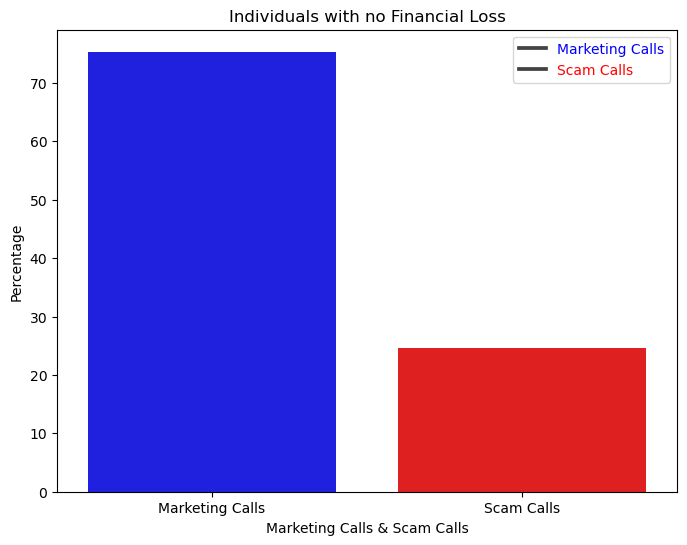

In [13]:
# Convert to percentage
percentage_counts = (no_financial_loss['Scam Call'].value_counts() / len(no_financial_loss)) * 100

bar_colors = ['blue', 'red']

# Rename 'Not Scam' to 'Marketing Calls' and 'Scam' to 'Scam Calls'
percentage_counts.rename(index={'Not Scam': 'Marketing Calls', 'Scam': 'Scam Calls'}, inplace=True)

# Plot percentage count plot of 'Scam Call' column
plt.figure(figsize=(8, 6))
sns.barplot(x=percentage_counts.index, y=percentage_counts.values, palette=bar_colors)
plt.title('Individuals with no Financial Loss')
plt.xlabel('Marketing Calls & Scam Calls')
plt.ylabel('Percentage')
plt.legend(['Marketing Calls', 'Scam Calls'], labelcolor=['blue', 'red'])
plt.show()

In [25]:
# Individuals who fall victim to local Scam Calls 
local = df5[(df5['Financial Loss'] > 0) & (df5['Scam Call'] == 'Scam') & 
                                        (df5['Is International'] == 'No')]

# Count the occurrences of Individuals who fall victim to local Scam Calls 
local_counts = local['Is International'].value_counts()

print("\nIndividuals who fall victim to local Scam Calls:")
print(local['Is International'].value_counts())

# Individuals who fall victim to oversea Scam Calls 
oversea = df5[(df5['Financial Loss'] > 0) & (df5['Scam Call'] == 'Scam') & 
                                        (df5['Is International'] == 'Yes')]

# Count the occurrences of Individuals who fall victim to oversea Scam Calls
oversea_counts = oversea['Is International'].value_counts()

print("\nIndividuals who fall victim to oversea Scam Calls:")
print(oversea['Is International'].value_counts())



Individuals who fall victim to local Scam Calls:
No    137
Name: Is International, dtype: int64

Individuals who fall victim to oversea Scam Calls:
Yes    2267
Name: Is International, dtype: int64


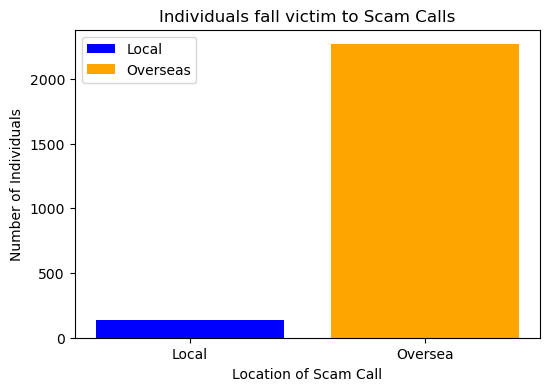

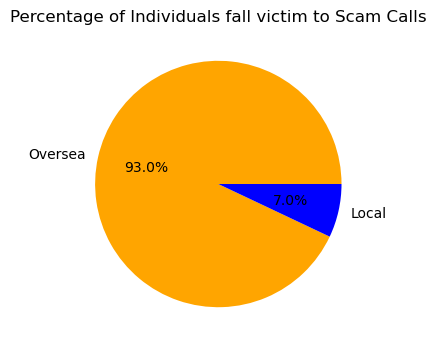

In [56]:
# Rename Is International column 'No' to 'Local' and 'Yes' to 'Oversea'
local_counts.rename(index={'No': 'Local', 'Yes': 'Oversea'}, inplace=True)

# Rename Call Type column 'Not Scam' to 'Marketing Calls' and 'Scam' to 'Scam Calls'
oversea_counts.rename(index={'No': 'Local', 'Yes': 'Oversea'}, inplace=True)

# Plot the graph
plt.figure(figsize=(6, 4))
plt.bar(local_counts.index, local_counts.values, color='blue', label='Local')
plt.bar(oversea_counts.index, oversea_counts.values, color='orange', label='Overseas')

plt.title('Individuals fall victim to Scam Calls')
plt.xlabel('Location of Scam Call')
plt.ylabel('Number of Individuals')
plt.legend()
plt.show()

# Rename 'Yes' to 'Oversea' and 'No' to 'Local'
total_counts.rename(index={'Yes': 'Oversea', 'No': 'Local'}, inplace=True)

# Plot pie chart
plt.figure(figsize=(4, 4))
plt.pie(total_counts, labels=total_counts.index, autopct='%1.1f%%', colors=['orange', 'blue'])
plt.title('Percentage of Individuals fall victim to Scam Calls')
plt.show()


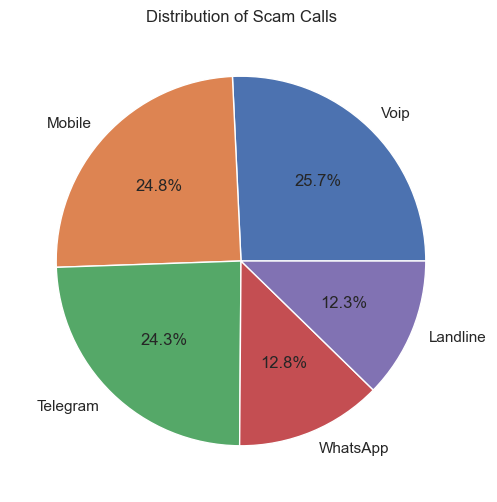

In [80]:
for feature in ['Call Type']:
    # Create a new figure for the pie chart
    plt.figure(figsize=(6, 6))
    
    # Convert to percentage
    percentage_counts = (df5[feature].value_counts() / len(df5)) * 100
    
    # Plot pie chart, 
    plt.pie(percentage_counts, labels=df5[feature].unique(), autopct='%1.1f%%')
    
    # Set title
    plt.title('Distribution of Scam Calls')
    
    # Show pie chart
    plt.show()